# reading from topic output of mallet

In [1]:
%matplotlib inline

In [2]:
f=open('doc-topics-plsqbs.txt','r')
doctopic=f.read()
print len(doctopic)    
doctopic_list=doctopic.split('\n')
len(doctopic_list)

716951


1429

In [14]:
filenames=[]
data=[]
data_str=[]
for line in doctopic_list:
    if line!='':
        line=line.split('\t')
        filenames.append(line[1])
        line_float=[float(i) for i in line[2:]]
        data_str.append(line[2:])
        data.append(line_float) 

In [5]:
data[0]

[0.011415594002482744,
 0.005885378407627647,
 0.003986186405097534,
 0.004339047253955521,
 0.0017182971671151955,
 0.003664506667357071,
 0.004629498115529917,
 0.004279174625756634,
 0.004797538076906025,
 0.00316033574526178,
 0.47543178714888623,
 0.014250763993590355,
 0.003255246624034641,
 0.2702110575852668,
 0.004232455216165058,
 0.005545267250430477,
 0.07093450286766477,
 0.002885838714718836,
 0.007439699809395629,
 0.0979378243227571]

In [8]:
print filenames[0].split('/')[-1].split('.')[0].split("_")[0]

二黄原板


In [15]:
print len(filenames)
print len(data)
print len(data_str)

1429
1429
1429


In [18]:
header=range(20)

In [20]:
header.append('class')

In [21]:
header

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 'class']

In [17]:
names=[file.split('/')[-1].split('.')[0].split("_")[0] for file in filenames]
header=range(20)
header.append('class')

f=open('plsqbs_mallet_train.txt','w')
f.write(','.join(header)+'\n')
for i in range(len(data)):
    numbers=",".join(data_str[i])
    label=names[i]
    line=numbers + "," + label
    f.write(line+"\n")
f.close()

In [5]:
import numpy as np
dtm=np.array(data)

In [6]:
dtm

array([[  1.14155940e-02,   5.88537841e-03,   3.98618641e-03, ...,
          2.88583871e-03,   7.43969981e-03,   9.79378243e-02],
       [  3.56280792e-02,   7.59509181e-04,   5.14418099e-04, ...,
          3.72418024e-04,   9.60094647e-04,   4.10017083e-03],
       [  3.31806635e-01,   6.83624529e-04,   4.63021171e-04, ...,
          3.35208715e-04,   8.64168949e-04,   3.26485555e-01],
       ..., 
       [  1.06425317e-03,   6.22338512e-02,   1.42247513e-01, ...,
          2.69041015e-04,   6.93588445e-04,   4.10084148e-01],
       [  3.18829422e-03,   2.01234139e-02,   5.65523221e-02, ...,
          8.05994231e-04,   2.07785525e-03,   3.78467059e-01],
       [  7.57079151e-02,   1.61391963e-03,   1.09311315e-03, ...,
          7.91369975e-04,   2.04015388e-03,   4.50013965e-02]])

In [7]:
from sklearn.metrics.pairwise import euclidean_distances

diste = euclidean_distances(dtm)

In [24]:
In [24]: from sklearn.metrics.pairwise import cosine_similarity

In [25]: distc = 1 - cosine_similarity(dtm)


In [8]:
In [34]: import os  # for os.path.basename

In [35]: import matplotlib.pyplot as plt

In [36]: from sklearn.manifold import MDS

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
In [37]: mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

In [38]: pose = mds.fit_transform(diste)  # shape (n_components, n_samples)

In [9]:
pose.shape

(1429, 2)

In [34]:
posc = mds.fit_transform(distc)

In [18]:
xs, ys = pose[:, 0], pose[:, 1]
names=[file.split('/')[-1].split('.')[0] for file in filenames]

In [21]:
for i in names[:10]:print i

二黄原板_一捧雪
二黄原板_七星灯
二黄原板_七步吟
二黄原板_三娘教子
二黄原板_三进士
二黄原板_三顾茅庐
二黄原板_上天台
二黄原板_串龙珠
二黄原板_临江驿
二黄原板_举鼎观画


In [22]:
len(names)

1429

In [26]:
import sys
reload(sys)
sys.setdefaultencoding("utf-8")
'二黄原板' in name

In [ ]:
# -*- coding: utf-8 -*-

from __future__ import unicode_literals

for x, y, name in zip(xs, ys, names):
    print name
    if '西皮原板' in name:
        color = 'orange'
    elif '二黄原板' in name:
        color = 'yellow'    
    elif '西皮慢板' in name:
        color = 'skyblue'
    elif '二黄慢板' in name:
        color = 'blue'
    elif '西皮摇板' in name:
        color = 'red'
    elif '二黄摇板' in name:
        color = 'deeppink'
    elif '快板' in name:
        color = 'yellow'
        
    plt.scatter(x, y, c=color)
    
    #plt.text(x, y, name) 
    #plt.savefig('mds1.pdf', format='pdf')


In [32]:

# Get current size
fig_size = plt.rcParams["figure.figsize"]

# Prints: [8.0, 6.0]
print "Current size:", fig_size

# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size


1429

# select data set by length

In [44]:
mypath="/Users/zangsir/Desktop/data_collection_ismir16/play_sq_bs_docs/naming_sqbs_pl/"

In [42]:
from os import listdir

In [45]:
onlyfiles = [ f for f in listdir(mypath) if f.endswith(".txt") ]


In [46]:
print onlyfiles

In [56]:
import codecs
doclen=[]
for file in onlyfiles:
    f=open(file,'r')
    doc=f.read()
    f.close()
    doclen.append(len(codecs.decode(doc,'utf-8')))

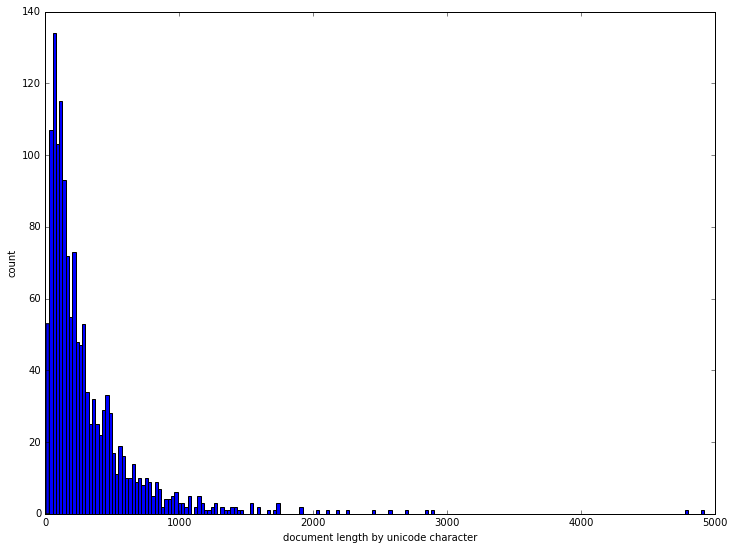

In [63]:
plt.xlabel('document length by unicode character')
plt.ylabel('count')
plt.hist(doclen,bins=200)#range=[6.5, 12.5]
plt.savefig('doclen.pdf', format='pdf')

In [60]:
len(codecs.decode(doc,'utf-8'))

216